In [573]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from exploration_utils import *

In [574]:
material_data = pd.read_csv("result_data/material_perf_10.csv")

social_data = pd.read_csv("result_data/social_perf_10.csv")

physical_data = pd.read_csv("result_data/physical_perf_10.csv")

with open("truism_data/physical_data.json", "r") as f:
    physical_params = json.load(f)

with open("truism_data/material_data.json", "r") as f:
    material_params = json.load(f)

with open("truism_data/social_data.json", "r") as f:
    social_params = json.load(f)

In [575]:
templates = get_templates([physical_params, material_params, social_params])

In [576]:
template_perturb_dict = get_perturbations(material_data, templates)
for key in template_perturb_dict:
    template_perturb_dict[key]["count"] = 0

In [577]:
perturbation_order = get_perturbation_order(material_data, 24)

In [578]:
template_perturb_dict = fill_pertubation_data(material_data, material_params, template_perturb_dict)
template_perturb_dict = fill_pertubation_data(physical_data, physical_params, template_perturb_dict)
template_perturb_dict = fill_pertubation_data(social_data, social_params, template_perturb_dict)

In [579]:
template_accuracy = aggregate_templates(template_perturb_dict, "accuracy")
template_ratio = aggregate_templates(template_perturb_dict, "ratio_score")

In [580]:
template_accuracy

{'1': {'count': 243.0, 'pct': 0.50625, 'total': 480.0},
 '2': {'count': 247.0, 'pct': 0.5145833333333333, 'total': 480.0},
 '4': {'count': 51.0, 'pct': 0.53125, 'total': 96.0},
 '5': {'count': 76.0, 'pct': 0.5277777777777778, 'total': 144.0},
 '3': {'count': 116.0, 'pct': 0.48333333333333334, 'total': 240.0}}

In [581]:
template_ratio

{'1': {'count': 1.7776429739866355,
  'pct': 0.003703422862472157,
  'total': 480.0},
 '2': {'count': 18.356418546326797,
  'pct': 0.03824253863818083,
  'total': 480.0},
 '4': {'count': 8.081222078891457, 'pct': 0.08417939665511935, 'total': 96.0},
 '5': {'count': 3.945707512275537,
  'pct': 0.027400746613024565,
  'total': 144.0},
 '3': {'count': -6.63885182723725,
  'pct': -0.027661882613488543,
  'total': 240.0}}

In [597]:
def display_two_axis_bar_plot(x_labels, x_label, left_units, right_units, 
                              left_bar_data, right_bar_data, title, save=False):
    
    # https://matplotlib.org/gallery/api/two_scales.html
    
    # https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    fig, ax1 = plt.subplots()
    x = np.arange(len(x_labels))
    width = 0.35
    
    color = 'tab:red'
    ax1.set_ylabel(left_units, color=color)
    ax1.set_ylim(bottom=0)
    rects1 = ax1.bar(x - width/2, left_bar_data, width, label=left_units, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels)
    ax1.set_xlabel(x_label)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel(right_units, color=color)
    ax2.set_ylim(bottom=-1, top=1)
    rects2 = ax2.bar(x + width/2, right_bar_data, width, label=right_units, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax1.legend(loc=2)
    ax2.legend(loc=0)
    
    autolabel(rects1, ax1, False, "tab:red")
    autolabel(rects2, ax2, True, "tab:blue")
    
    ax1.set_title(title)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.savefig("{}.pdf".format(title), format='pdf', dpi=1200)
#         fig.savefig('myimage.svg', )
    
    plt.show()

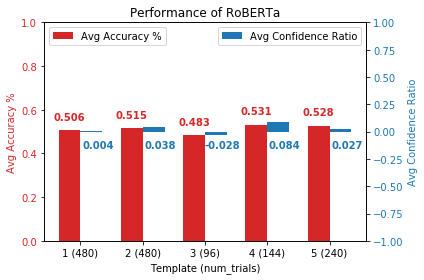

In [598]:
x_labels = ["1 (480)", "2 (480)", "3 (96)", "4 (144)", "5 (240)"]
x_label = "Template (num_trials)"
left_units = "Avg Accuracy %"
right_units = "Avg Confidence Ratio"
left_bar_data = [round(template_accuracy[str(i)]["pct"], 3) for i in range(1, 6)]
right_bar_data = [round(template_ratio[str(i)]["pct"], 3) for i in range(1, 6)]
title = "Performance of RoBERTa"
display_two_axis_bar_plot(x_labels, x_label, left_units, right_units, 
                              left_bar_data, right_bar_data, title, True)